In [99]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## 간단한 전처리

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## 선형분류기의 분류 결과 시각화를 위한 코드

In [102]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

## 분류 vs 회귀

#### 분류 : 데이터 값들을 기반으로 범주화(categorization)
ex. 주식 데이터 기반으로 "주가 상승", "주가 하락", "유지" 중 예측

#### 회귀 : 연속적인 데이터 값 자체를 예측
ex. 주식 데이터 기반으로 "주가"를 예측

2주차 수업에서는 머신러닝을 통한 분류에 대해 설명할것이다.


선형적으로 분류되는 데이터와 그렇지 않은 데이터는 각자 다름 분류 알고리즘을 요구한다. 기본적인 머신러닝 알고리즘 (퍼셉트론, 아달린, 로지스틱)은 사실 활성화 함수의 차이고 기본적인 알고리즘은 같음으로 
이들에 대해 먼저 소개하겠다!

## 선형 vs 비선형

사실 데이터셋의 구조에 따라서 분류기의 성능이 많이 차이난다.
또한 모든 데이터셋에 대해서 늘 최적의 성능을 보여주는 모델은 없다!

책에서는 공짜 점심없음 이론이라고 설명한다.
한마디로 날로먹을수 있는 공짜밥은 없다는것이다..

데이터셋이 선형적인 구조면 사실 많은 분류 알고리즘을 적용할수 있다. 하지만 문제는 우리는 어떤데이터가 선형적인 관계인지 모른다는 것이다.

사이킷런과 pandas, matplot, seaborn의 등의 라이브러리 함수를 이용해서 데이터가 선형적인지, 비선형적인지 관측해보자.

그 과정은 아래와 같다
1. 상관관계 행렬을 시각화, 정렬해서 상관계수가 높은 데이터를 뽑는다.
2. 목표 레이블과의 다른 데이터셋들의 관계를 시각화한다.
3. 시각화된 그림중 선형적으로 구분이 되는 데이터를 육안으로 판별한다.


In [103]:
import pandas as pd

print(iris.target_names)
print(iris.feature_names)
colnames = iris.feature_names

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [104]:
df_iris = pd.DataFrame(data=iris.data, columns=colnames)
df_iris["Target"] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [105]:
iris_corr = df_iris.corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [106]:
iris_corr["Target"].sort_values

<bound method Series.sort_values of sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
Target               1.000000
Name: Target, dtype: float64>

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='Target', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='Target', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='

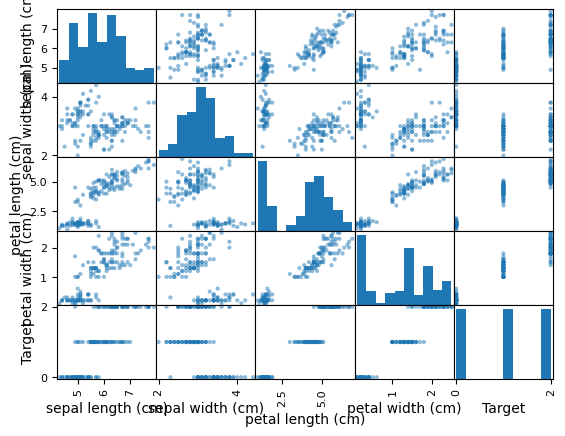

In [107]:
from pandas.plotting import scatter_matrix
import scipy

chosen_features = colnames
scatter_matrix(df_iris)

### 분석결과
target은 아무래도 범주가 3개이다 보니, 어떤 데이터셋과도 선형적인 관계는 힘들것이다. 하지만 petal length, petal width와 같은 데이터들은 선형적인 관계가 있다 할수있따.

In [108]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
# 'petal length (cm)', 'petal width (cm)'
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

# 편향과 분산

훈련시 데이터셋에 높은 정확도를 보이는 모델이 무조건 최적의 모델일까?

In [110]:
from IPython.display import Image
%matplotlib inline

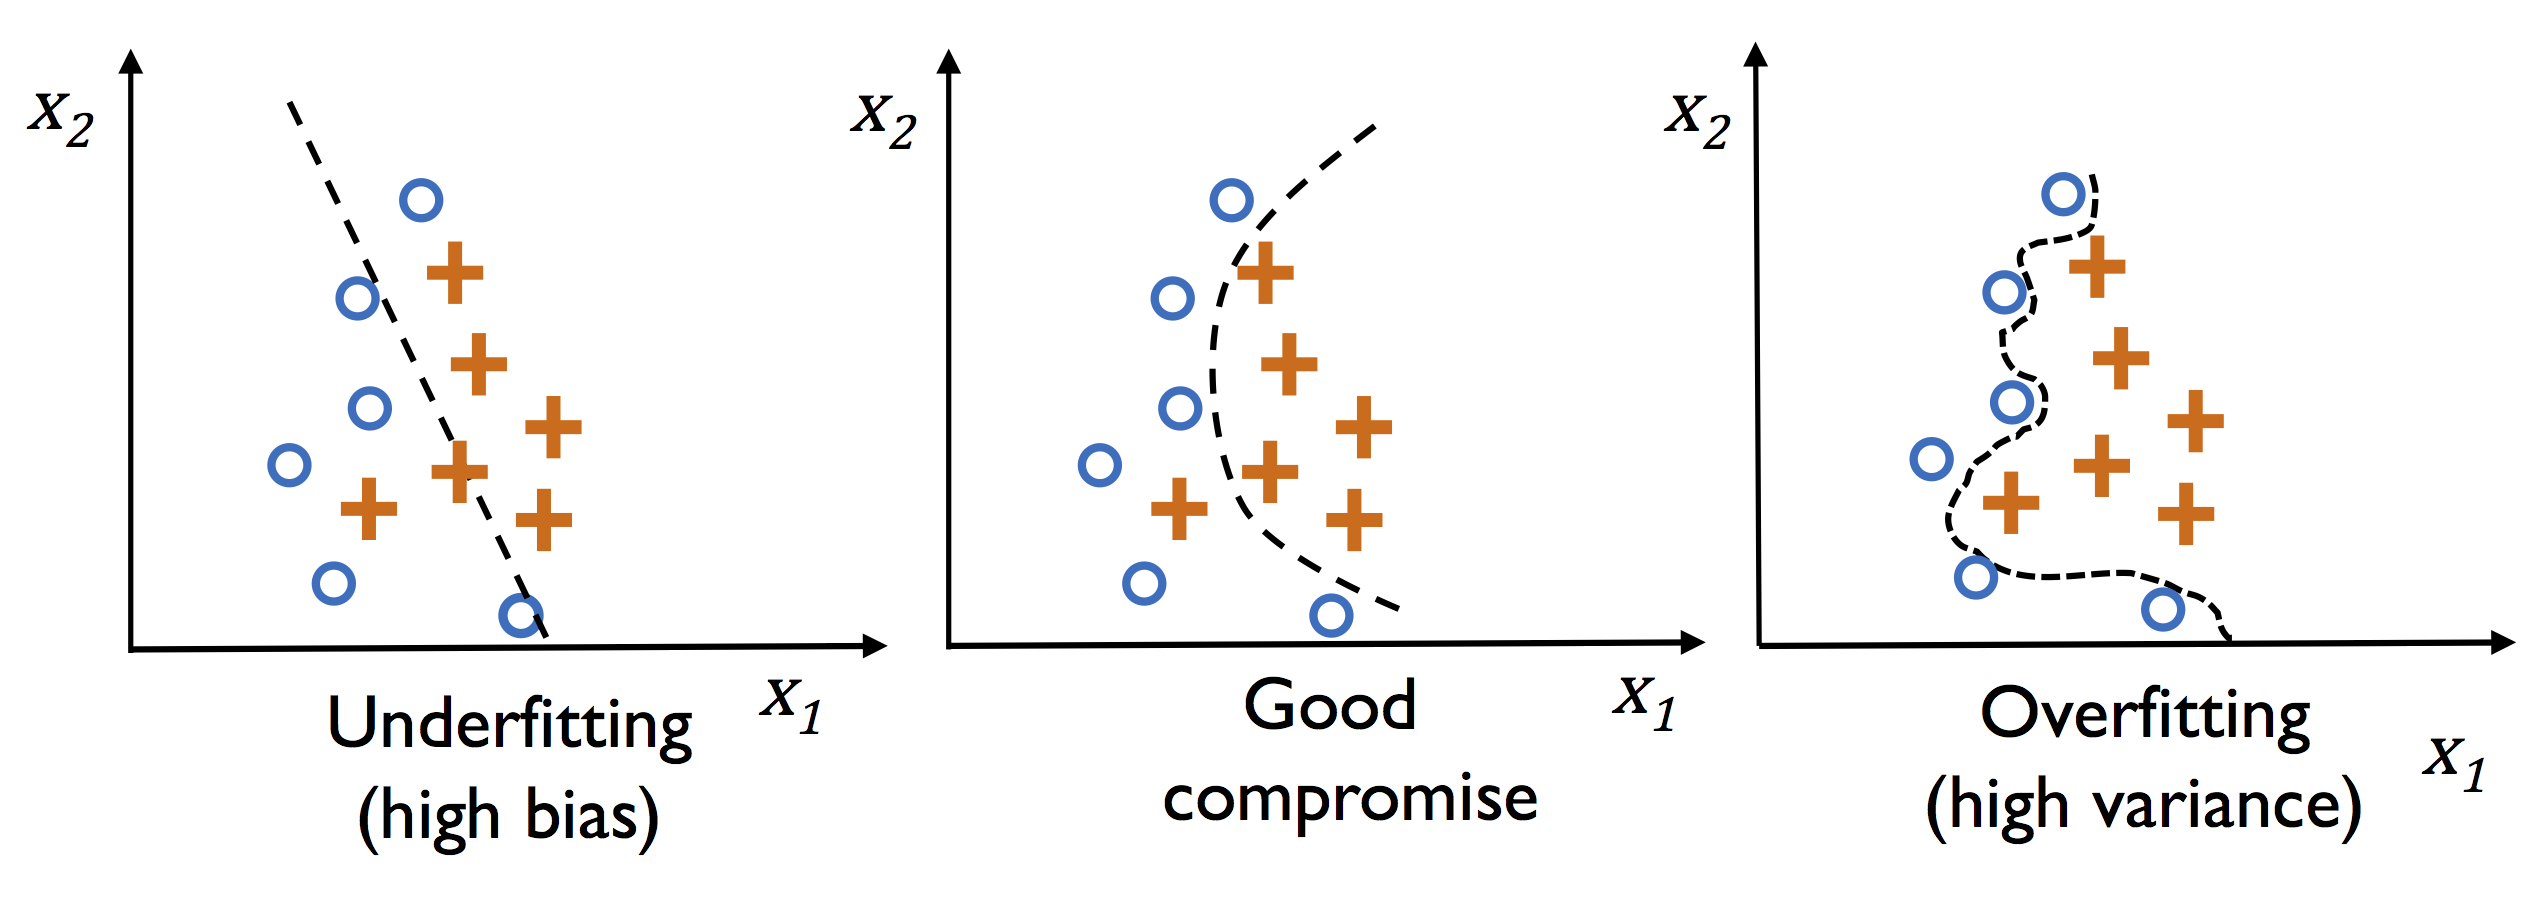

In [111]:
Image(filename='images/03_07.png', width=750) 

### 왼쪽은 높은 편향 | 가운데는 좋은 타협점 | 오른쪽은 높은 분산


분산이 높다? => 특정 데이터셋만 잘 설명한다(무작위성에 약하다) => 일반화를 잘하지 못한다. 즉, 과적합됐다.(overfit)

편향이 낲다? => 구조적으로 정확한 값에서 멀이 벗어나있다. => 과소적합됐다.

즉, 어떤 모델이든지 과적합과 과소적합사이의 데이터 분류의 적절한 타협점을 찾아서 "일반화"를 잘 시키는것이 목적이다.

모델별 과소적합에 대해 튜닝할수있는 매개변수가 있다. 이는 하이퍼 파라미터라고 불린다.

모델별 파라미터에 대한 내용을 잘 숙지해서 개발자가 적절한 하이퍼 파라미터값을 찾아나가야한다. 이는 성능에 큰 영향을 미친다.

### 하이퍼 파라미터 C와 l1, l2규제.

$$
L1\ Regularization:\ \lambda \sum_{i=1}^{n} |w_i|
$$


$$
L2\ Regularization:\ \lambda \sum_{i=1}^{n} w_i^2
$$


주로 L2가 가장 많이 쓰인다.

하이퍼 파라미터 C는 규제함수의 $\lambda$의 역수다

규제 함수가 L2일때
#### C가 작아진다 -> 규제가 강해진다 (L2값이 커진다.) -> 과대적합을 "방지"한다.

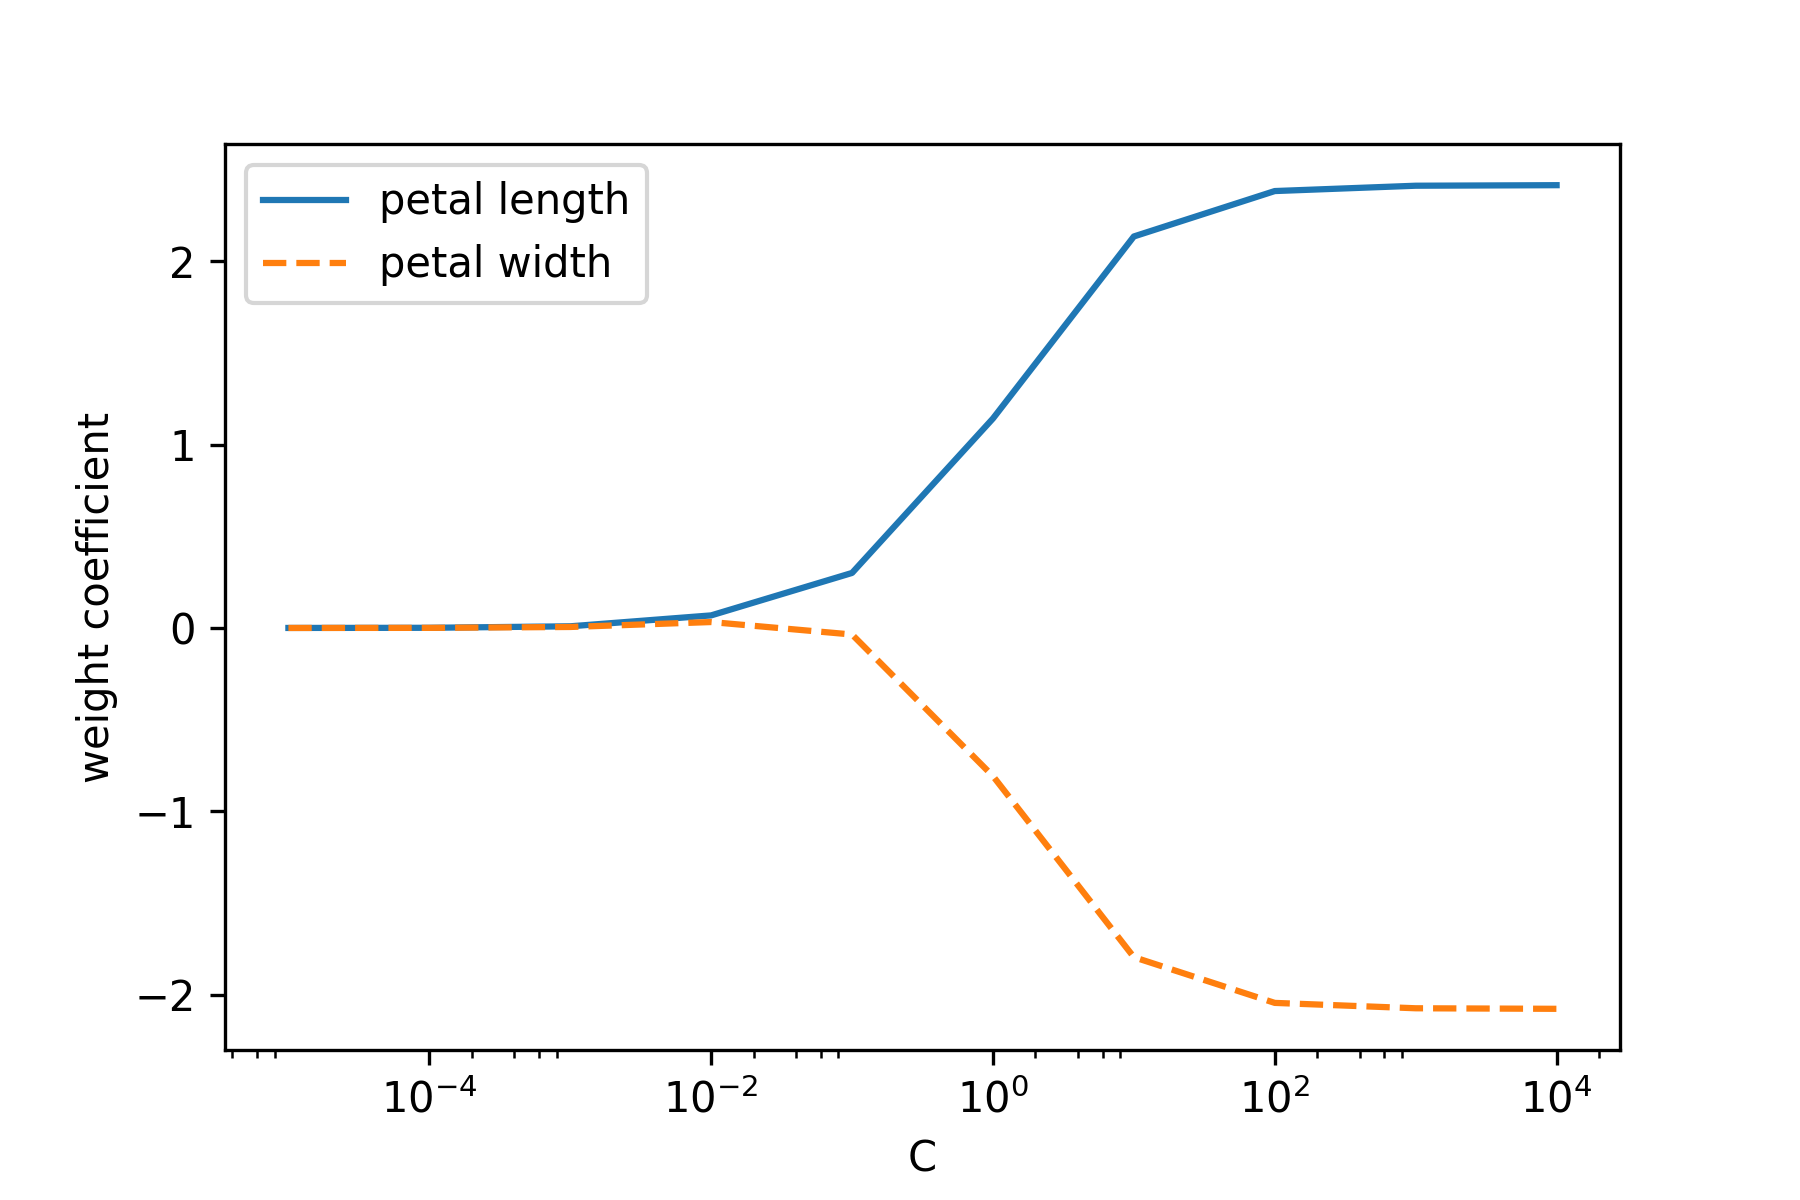

In [112]:
Image(filename='images/03_08.png', width=750) 

규제값이 작아질수록 가중치의 "절댓값"이 작아진다. 즉 규제강도가 증가해서 과적합을 방지해준다. (좀더 느슨한 구분선으루 분류해준다고 이해하면 된다.)

# 선형 데이터셋에 대한 분류 알고리즘

## 퍼셉트론

In [113]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 불러오기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 퍼셉트론 모델 생성
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=0)

# 모델 학습
perceptron.fit(X_train, y_train)

# 예측
y_pred = perceptron.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'퍼셉트론 정확도: {accuracy:.4f}')


퍼셉트론 정확도: 0.4667


#### 주요 하이퍼파라미터
- max_iter: 학습 과정에서의 최대 반복 횟수
- tol: 수렴 기준. 손실 함수의 변화가 tol 이하일 때 학습을 멈춤
- eta0: 학습률 (learning rate)
- random_state: 무작위성 제어를 위한 시드

## 아달린

In [114]:
from sklearn.linear_model import SGDClassifier

# 아달린 모델 생성 (loss='squared_loss'를 사용)
adaline = SGDClassifier(loss='squared_error', max_iter=1000, tol=1e-3)

# 모델 학습
adaline.fit(X_train, y_train)

# 예측
y_pred = adaline.predict(X_test)

#### 주요 하이퍼파라미터
- loss: 손실 함수 (예: 'hinge', 'log', 'squared_loss')
- penalty: 규제 방식 (예: 'l2', 'l1', 'elasticnet')
- max_iter: 최대 반복 횟수
- learning_rate: 학습률 조정 방식

## 로지스틱

In [131]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
log_reg = LogisticRegression(solver='liblinear')

# 모델 학습
log_reg.fit(X_train, y_train)

# 예측
y_pred = log_reg.predict(X_test)


#### 주요 하이퍼파라미터
- penalty: 규제 종류 ('l1', 'l2')
- C: 규제의 강도 (작을수록 강한 규제)
- solver: 최적화 알고리즘 선택 (예: 'liblinear', 'saga', 'newton-cg')
- max_iter: 최대 반복 횟수

## SVM 서포트 벡터 머신

In [116]:
from sklearn.svm import SVC

# SVM 모델 생성
svm_model = SVC(kernel='linear', C=1.0)

# 모델 학습
svm_model.fit(X_train, y_train)

# 예측
y_pred = svm_model.predict(X_test)


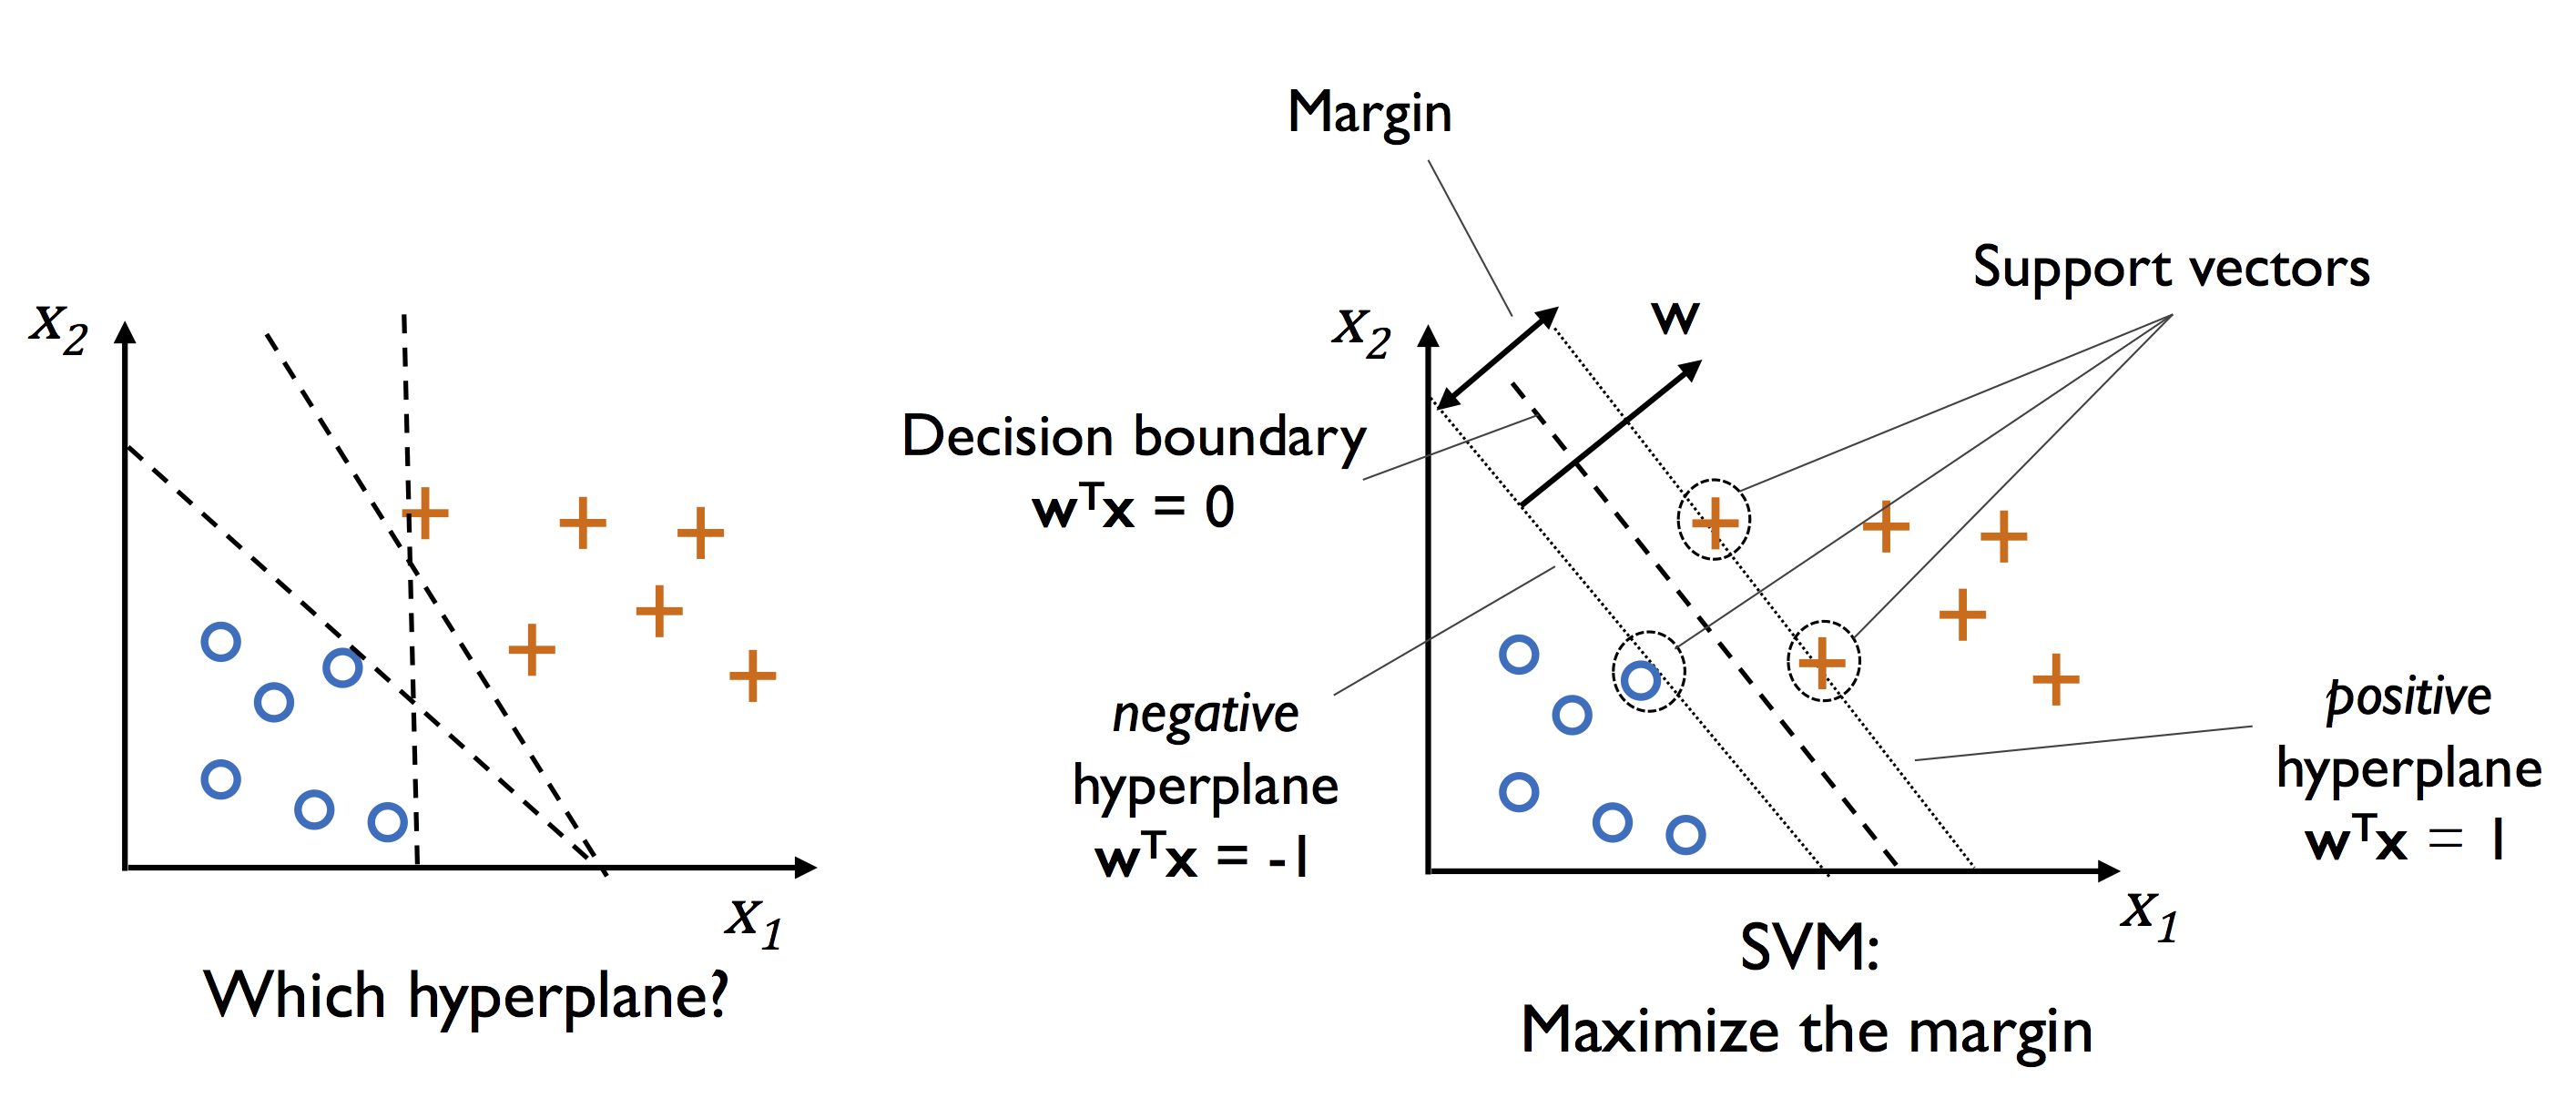

In [117]:
Image(filename='images/03_09.png', width=750) 

#### 주요 하이퍼파라미터
- C: 규제의 강도 (작을수록 규제가 강해짐)
- kernel: 커널 종류 ('linear', 'poly', 'rbf', 'sigmoid')
- gamma: 커널 함수에서의 거리 매개변수 (RBF 커널 등에 사용)
- max_iter: 최대 반복 횟수

실제 하이퍼 파라미터 튜닝결과에 대한 분류 차이그림 예지

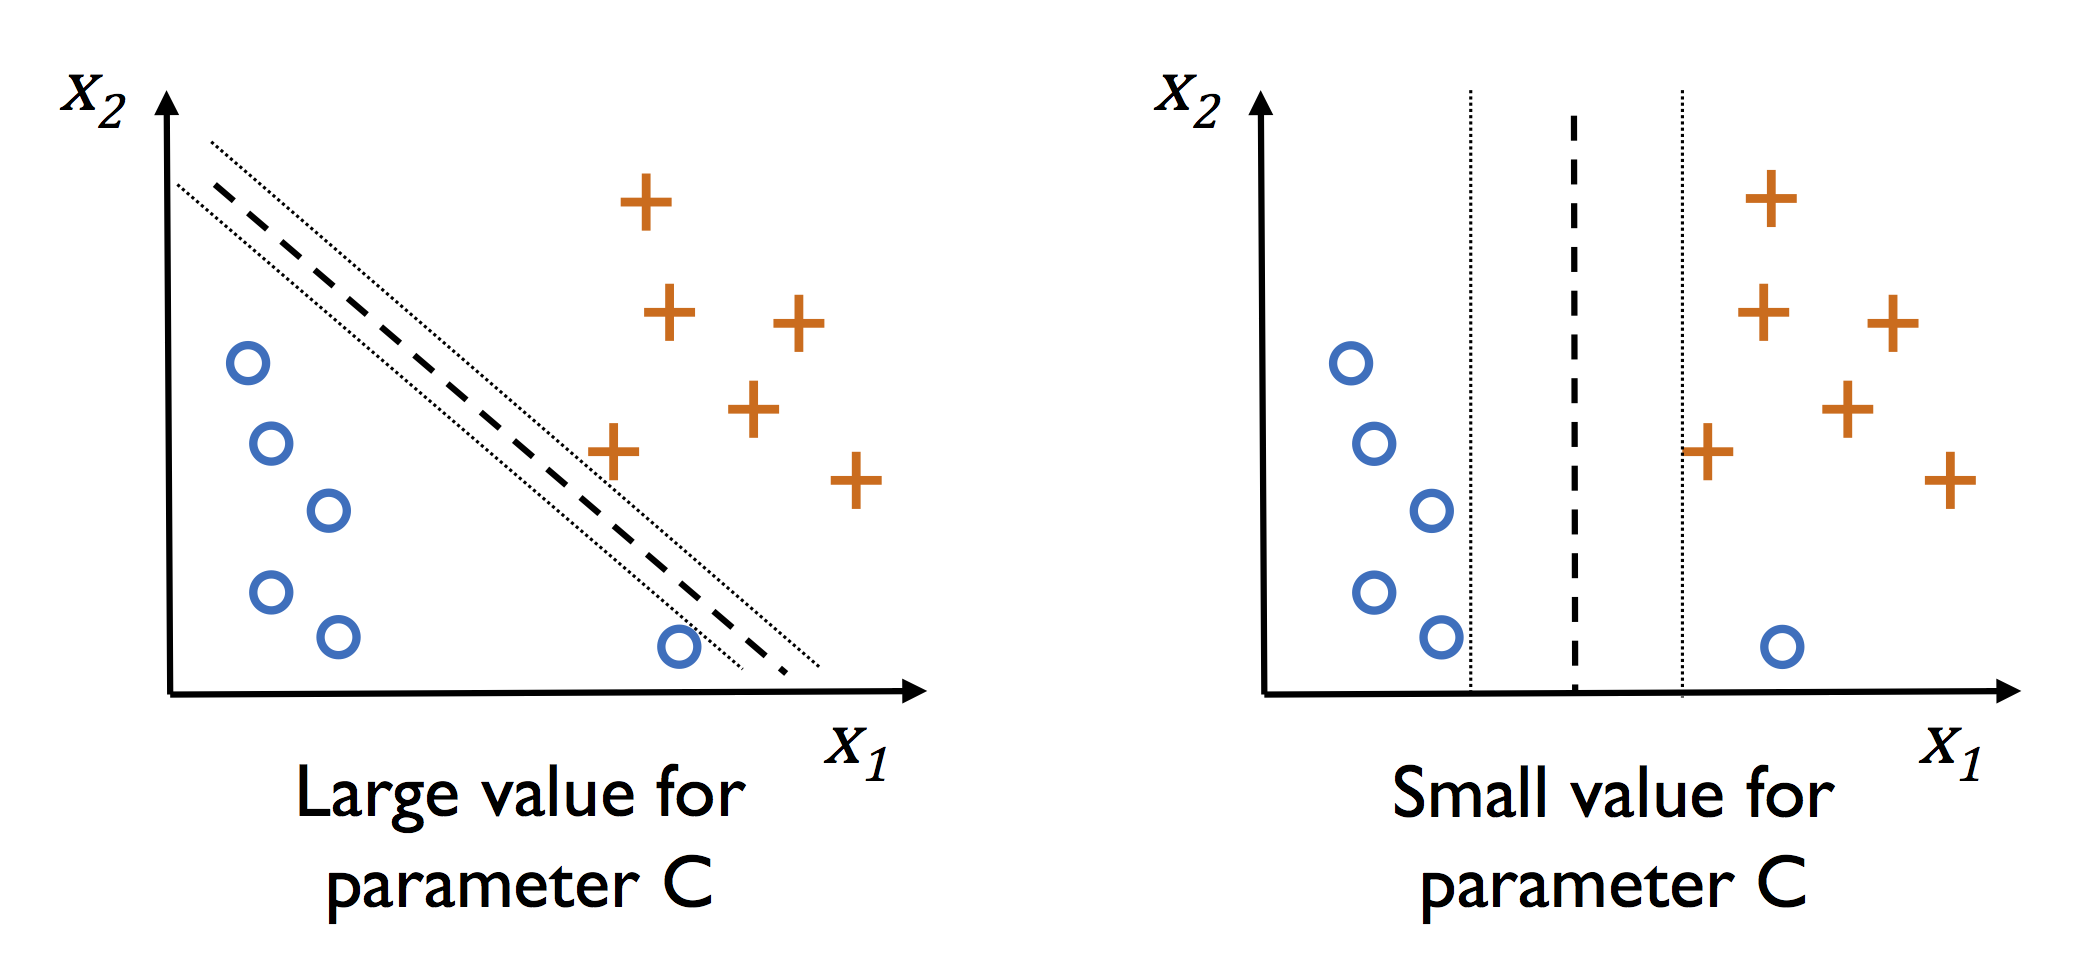

In [118]:
Image(filename='images/03_10.png', width=750) 

# 비선형 데이터셋에 대한 분류 알고리즘

## 커널 SVM

In [119]:
# 커널-SVM 모델 생성 (비선형 분류)
svm_model = SVC(kernel='rbf', C=1.0, gamma=0.1)

# 모델 학습
svm_model.fit(X_train, y_train)

# 예측
y_pred = svm_model.predict(X_test)


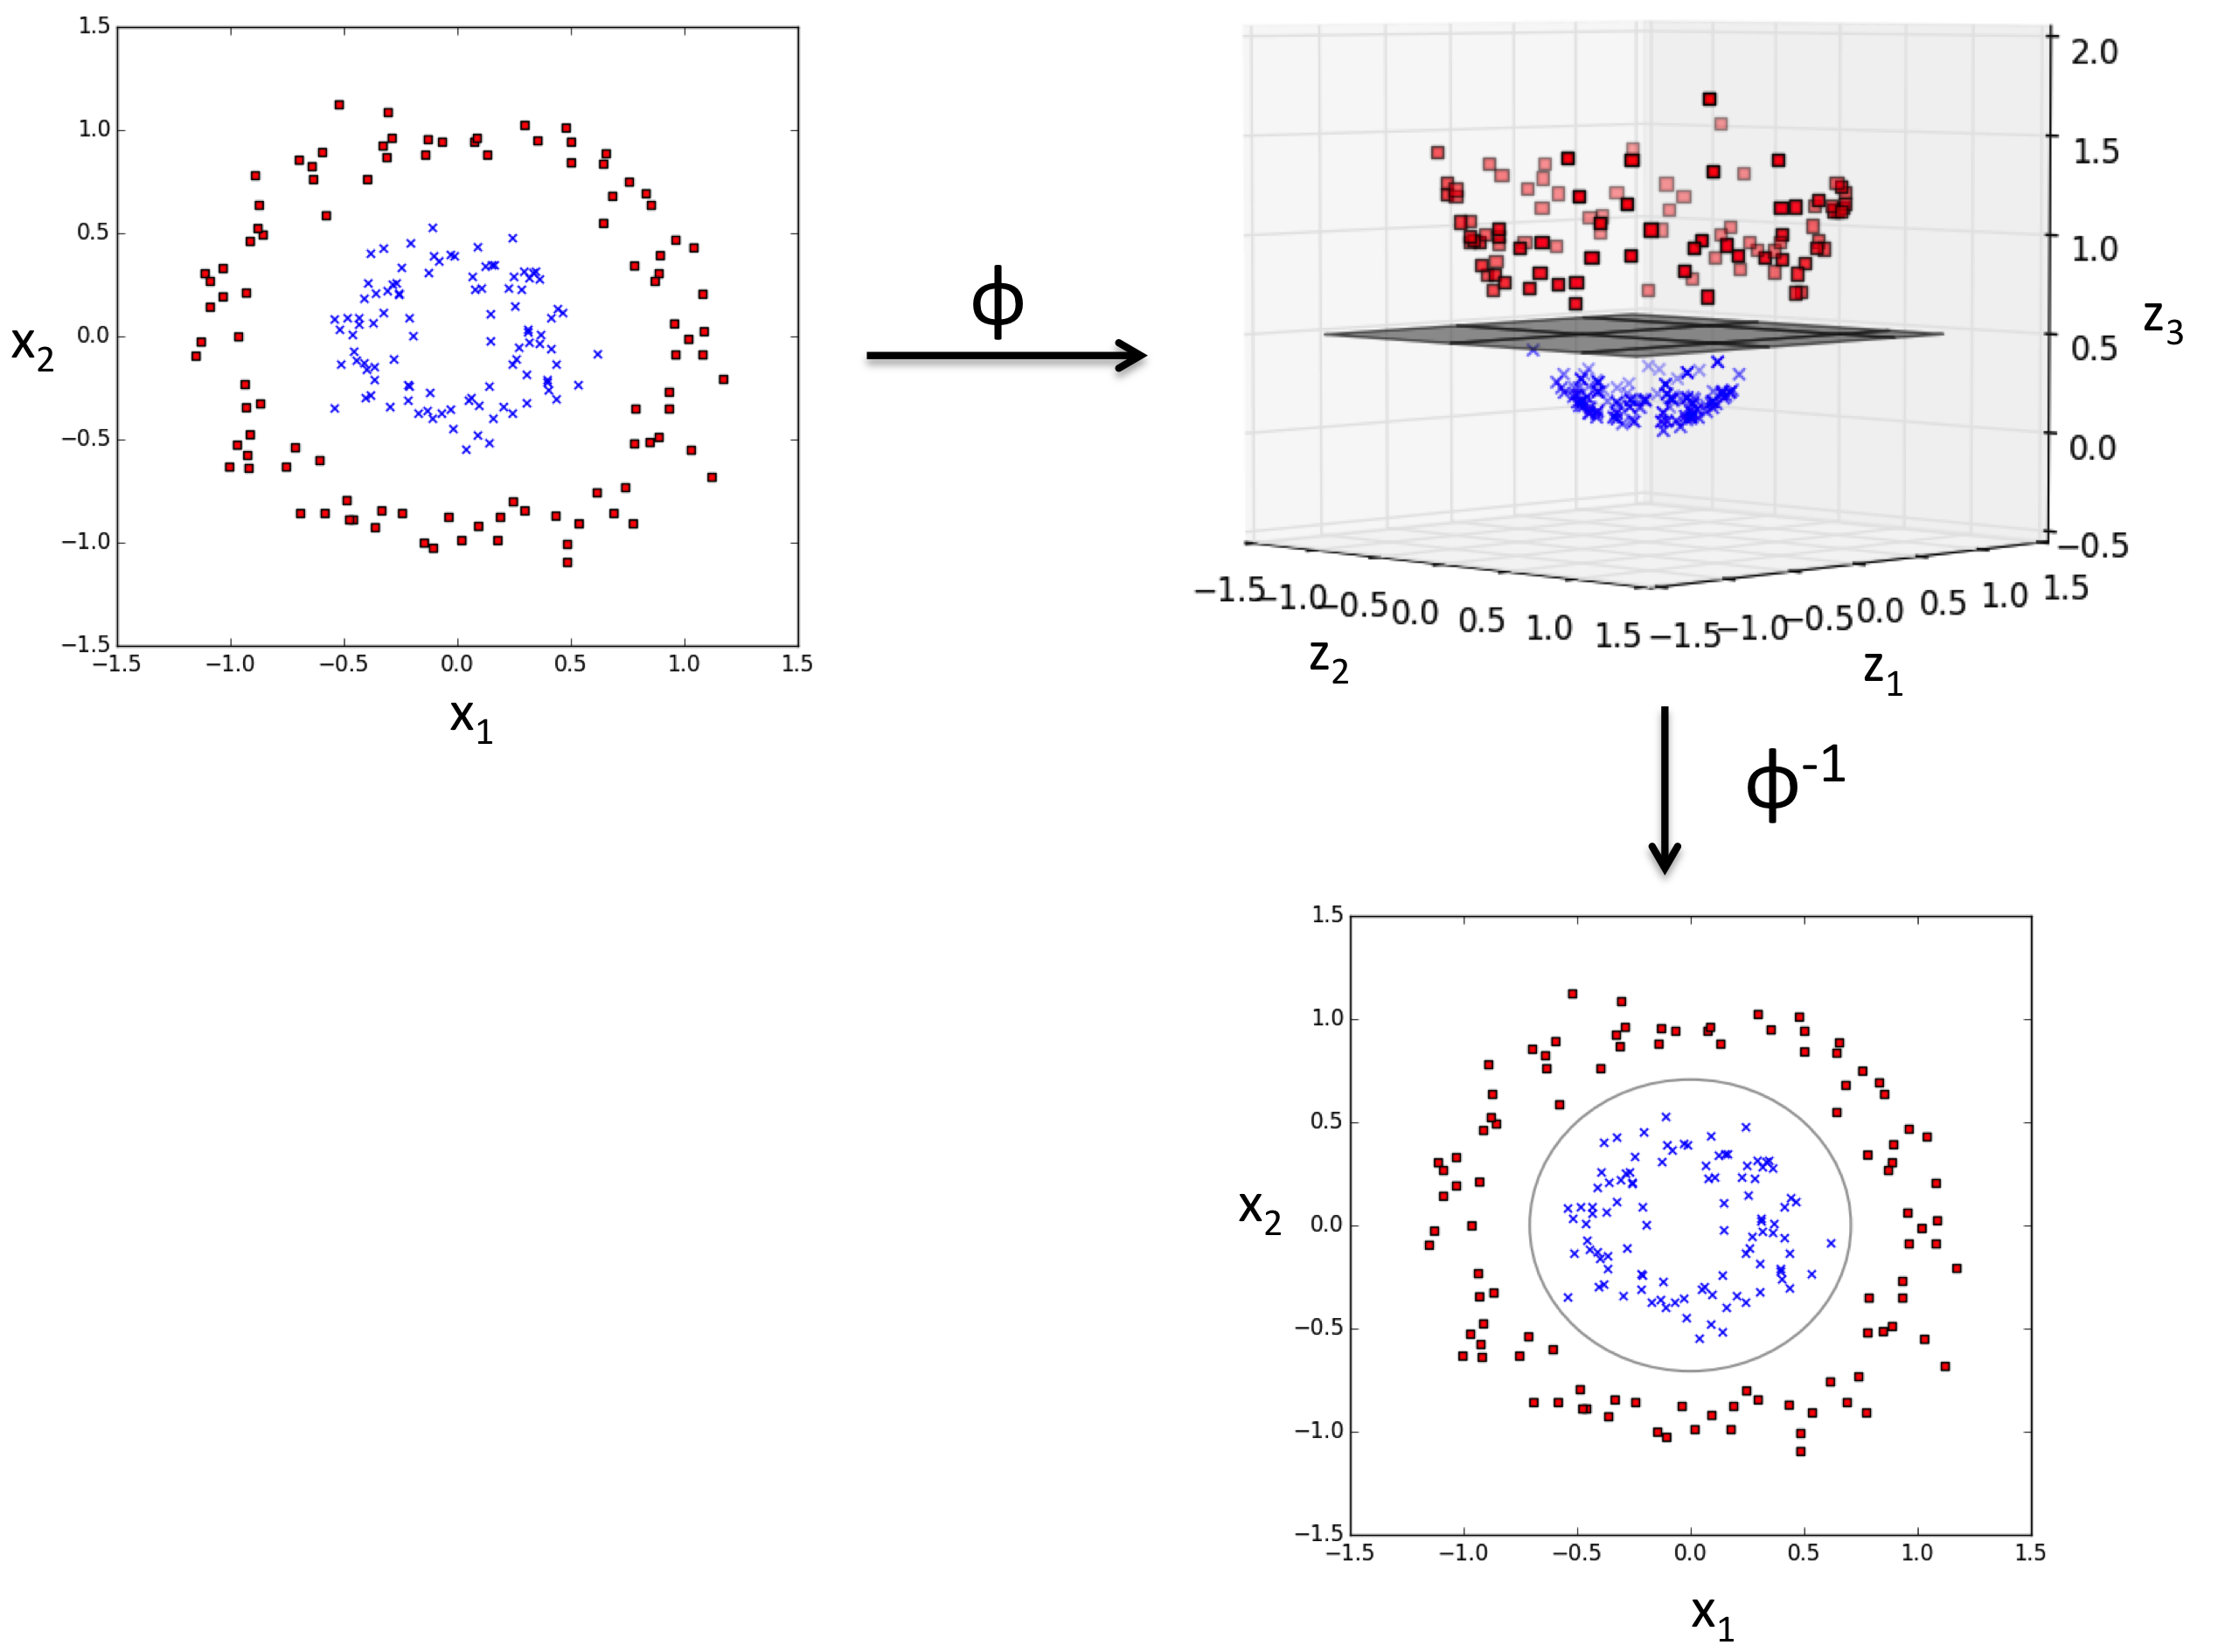

In [120]:
Image(filename='images/03_13.png', width=750) 

#### 주요 하이퍼파라미터
- C: 규제의 강도
- kernel: 커널 종류 ('rbf', 'poly', 'sigmoid')
- gamma: 커널에서의 거리 매개변수

gamma는 저 결정 경계인 "가우시안 구"(Gaussian sphere)의 크기를 "제한"하는 파라미터이다.

gamma가 작으면 결정경계는 범위가 커진다.

gamma가 커지면 결정경계는 범위가 작아지고, 더욱더 구불구불해진다.

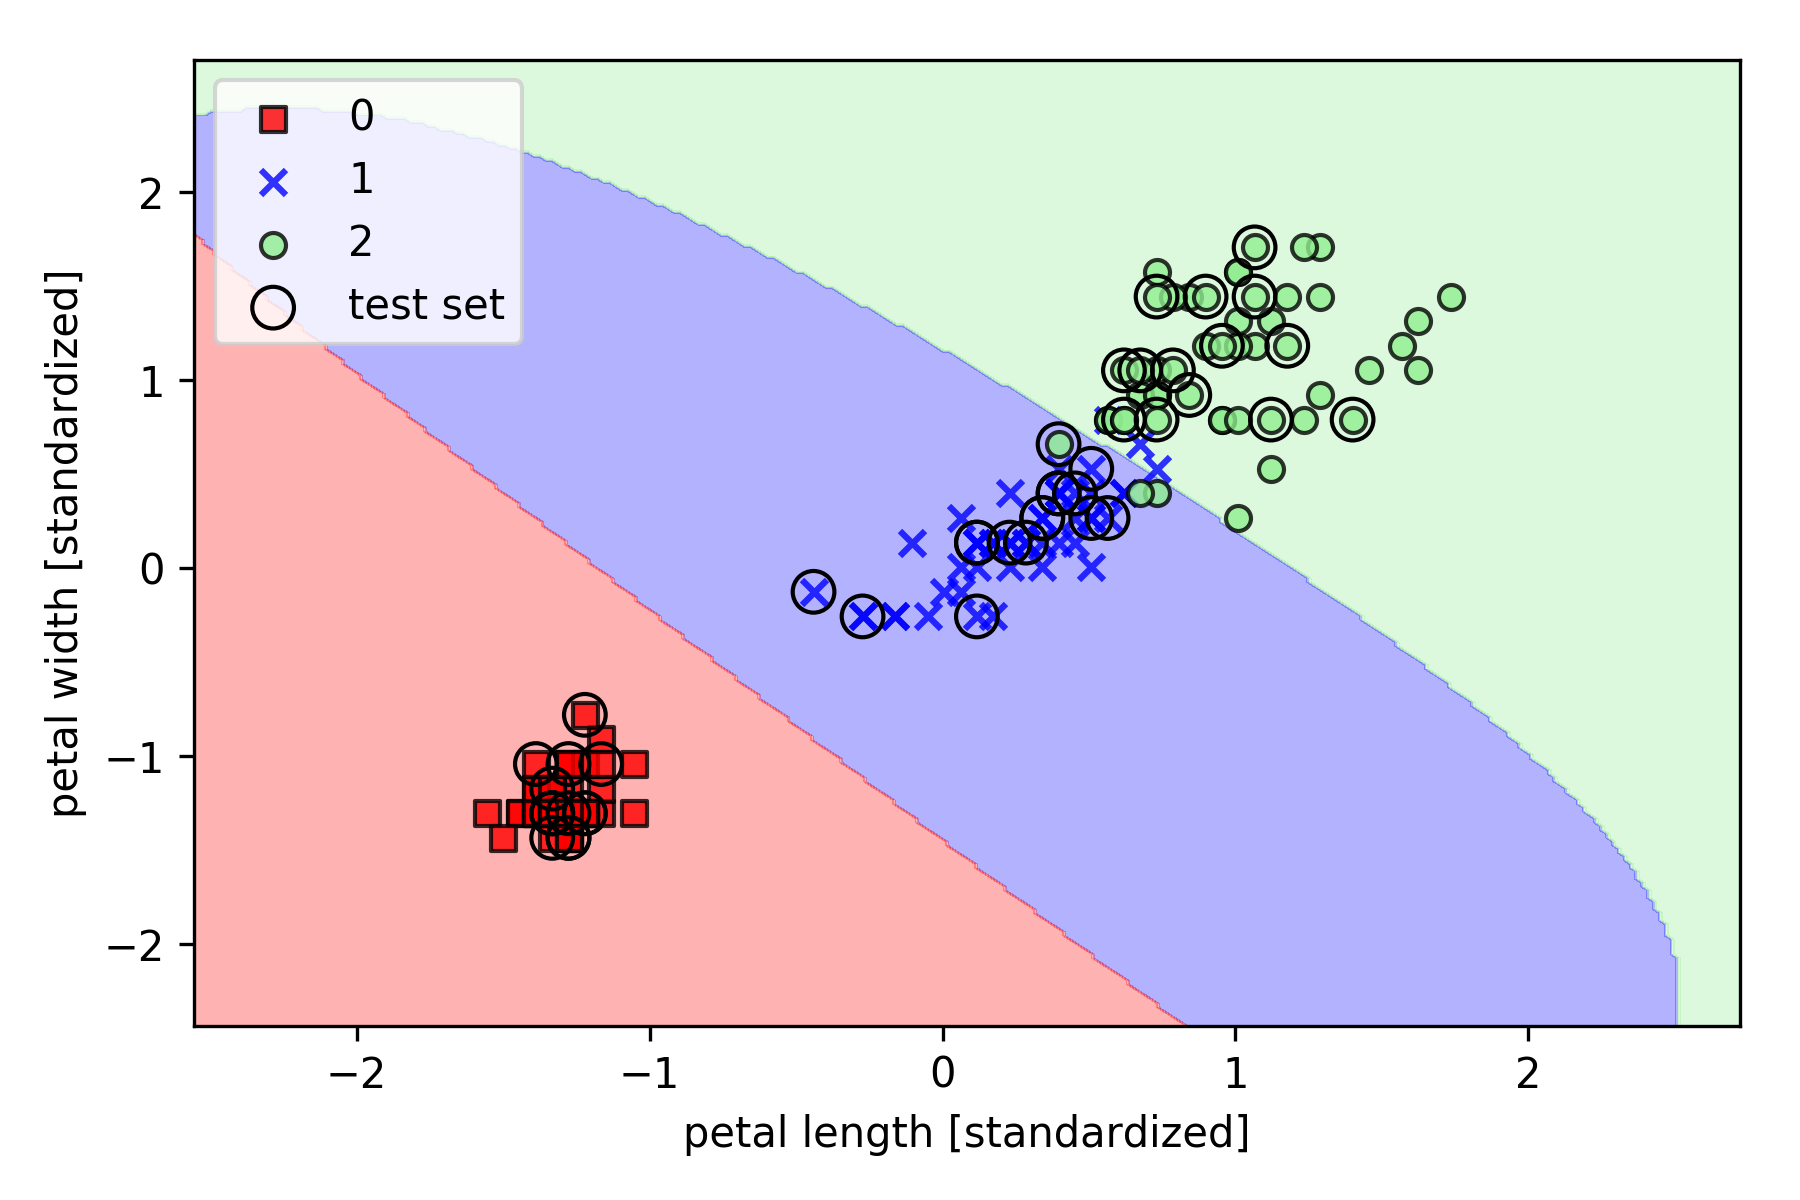

In [121]:
Image(filename='images/03_15.png', width=750)

#gamma = 0.2로 설정한 예시 그림

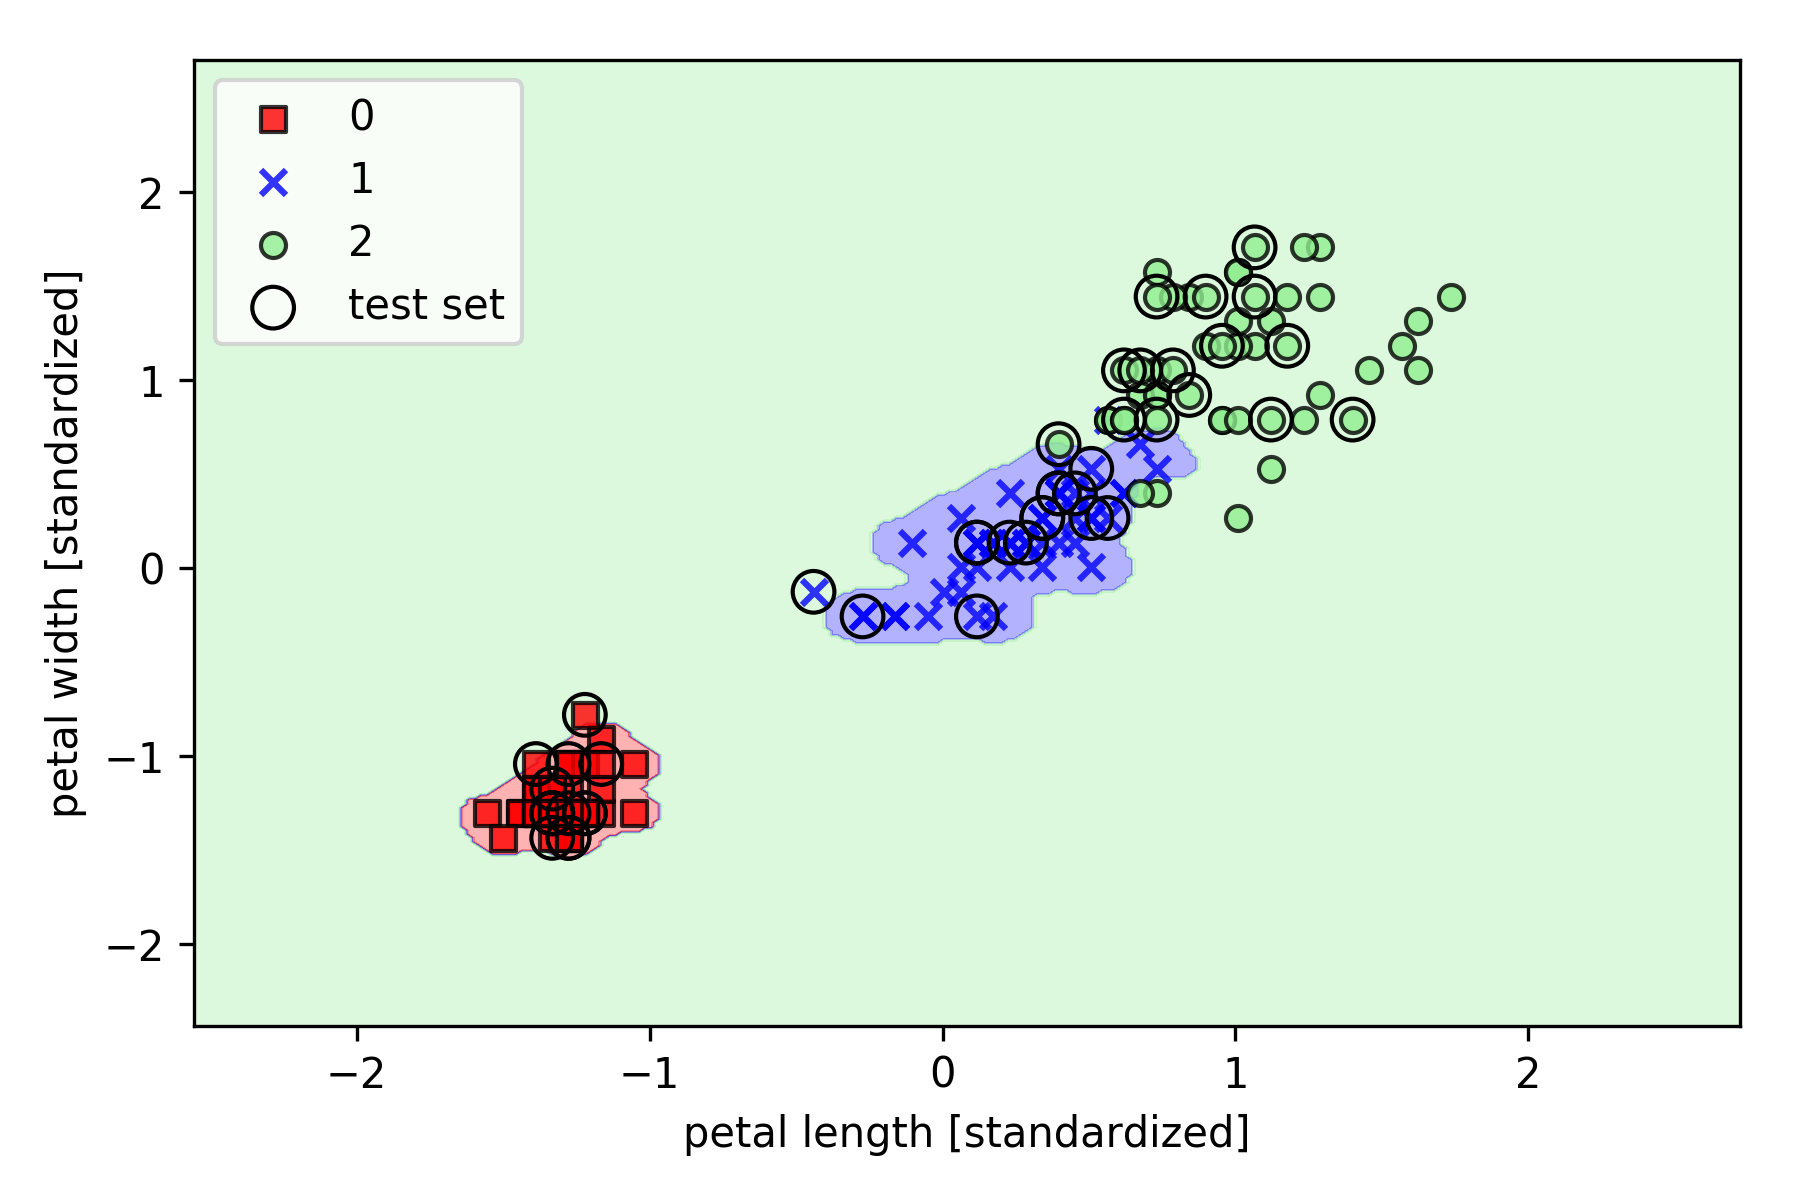

In [122]:
Image(filename='images/03_16.png', width=750)

# gamma를 100으로 설정했을때의 예씨그리

## 결정트리

In [123]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 생성
tree_model = DecisionTreeClassifier(max_depth=3)

# 모델 학습
tree_model.fit(X_train, y_train)

# 예측
y_pred = tree_model.predict(X_test)


#### 주요 하이퍼파라미터
- max_depth: 트리의 최대 깊이
- min_samples_split: 노드를 분할하기 위한 최소 샘플 수
- min_samples_leaf: 리프 노드가 되기 위한 최소 샘플 수
- criterion: 분할 품질 측정 방법 ('gini', 'entropy')

## 랜덤포레스트

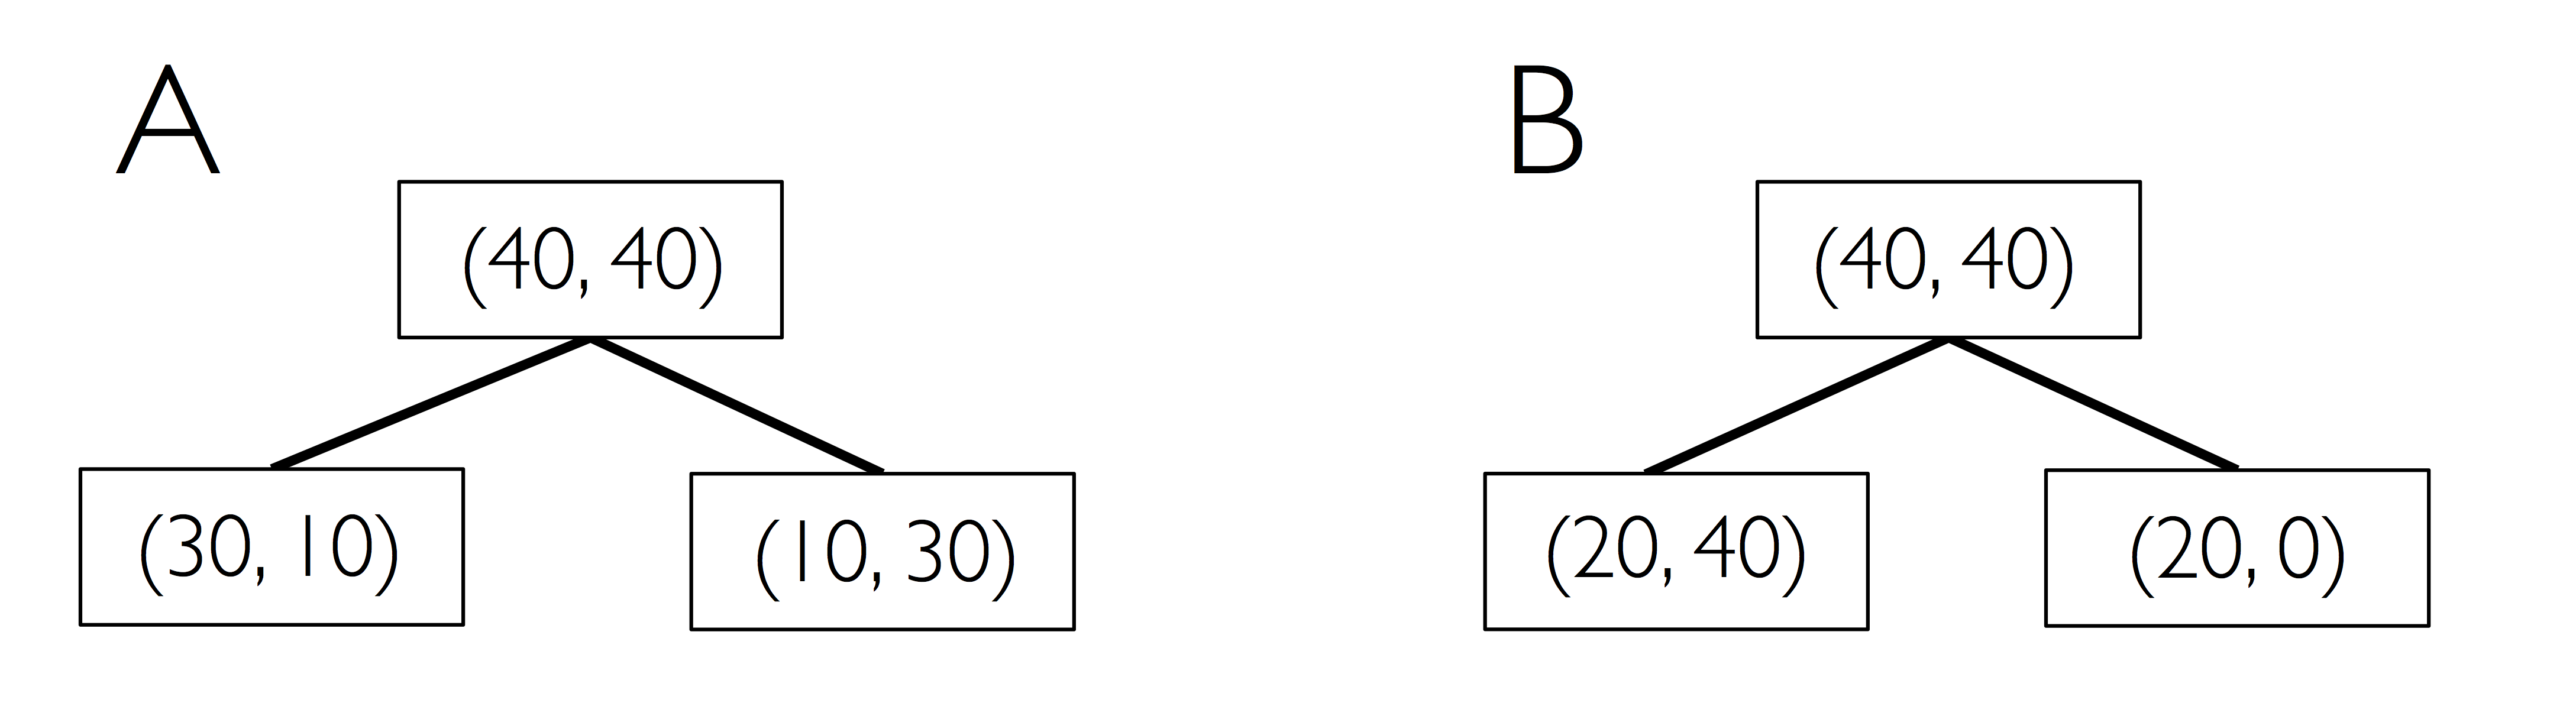

In [124]:
Image(filename='images/03_18.png', width=750)

컴퓨터가 특성 노드를 나눌때는 정보이득을 기준으로 판단한다.

정보 이득 계산을 실제로 책의 예시를보고 구해봤는데, 나중에 전~혀 쓸모가 없었음으로 그냥 과정을 보고 넘어가도록 하자.

그냥 자식노드와 부모노드의 분포차이가 정보이득으로 정량화된다고만 이해하고 넘가도록 하자.

### 정보 이득(Information Gain)

정보 이득은 특정 속성(attribute)이 데이터를 얼마나 잘 분류하는지를 나타내는 척도입니다. 정보 이득은 전체 데이터의 엔트로피에서 해당 속성으로 분할한 후의 엔트로피를 뺀 값으로 계산됩니다.

$$
IG(T, A) = H(T) - \sum_{v \in \text{Values}(A)} \frac{|T_v|}{|T|} H(T_v)
$$

여기서:
- \( IG(T, A) \)는 속성 \( A \)에 대한 정보 이득입니다.
- \( H(T) \)는 전체 데이터 집합 \( T \)의 엔트로피입니다.
- \( T_v \)는 속성 \( A \)의 값 \( v \)에 따라 분할된 데이터 집합입니다.
- \( \frac{|T_v|}{|T|} \)는 분할된 데이터 집합 \( T_v \)의 비율입니다.
- \( H(T_v) \)는 분할된 데이터 집합 \( T_v \)의 엔트로피입니다.

---

### 엔트로피(Entropy)

엔트로피는 데이터의 불확실성을 측정하는 척도입니다. 엔트로피가 높을수록 데이터는 더 혼란스럽고, 낮을수록 데이터는 더 순수합니다.

$$
H(T) = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

여기서:
- \( H(T) \)는 데이터 집합 \( T \)의 엔트로피입니다.
- \( p_i \)는 데이터 집합 \( T \)에서 클래스 \( i \)의 비율입니다.
- \( n \)은 클래스의 개수입니다.

---

### 예시

예를 들어, 데이터 집합 \( T \)에 두 개의 클래스 \( A \)와 \( B \)가 있다고 가정해봅시다. 각 클래스의 비율이 \( p_A = 0.6 \)이고 \( p_B = 0.4 \)일 때, 엔트로피는 다음과 같이 계산됩니다.

$$
H(T) = - (0.6 \log_2 0.6 + 0.4 \log_2 0.4) \approx 0.971 \text{ bits}
$$

만약 속성 \( A \)가 데이터를 두 그룹으로 분할한다고 가정하면, 각 그룹의 엔트로피와 전체 엔트로피를 이용해 정보 이득을 계산할 수 있습니다.

---

### 요약

- **정보 이득(IG)**: 속성을 사용하여 데이터를 분할했을 때 얻는 엔트로피 감소량.
- **엔트로피(H)**: 데이터의 불확실성 또는 혼란의 정도를 측정하는 값.

이러한 개념들은 주로 의사결정 나무(Decision Tree) 알고리즘에서 중요한 역할을 합니다.


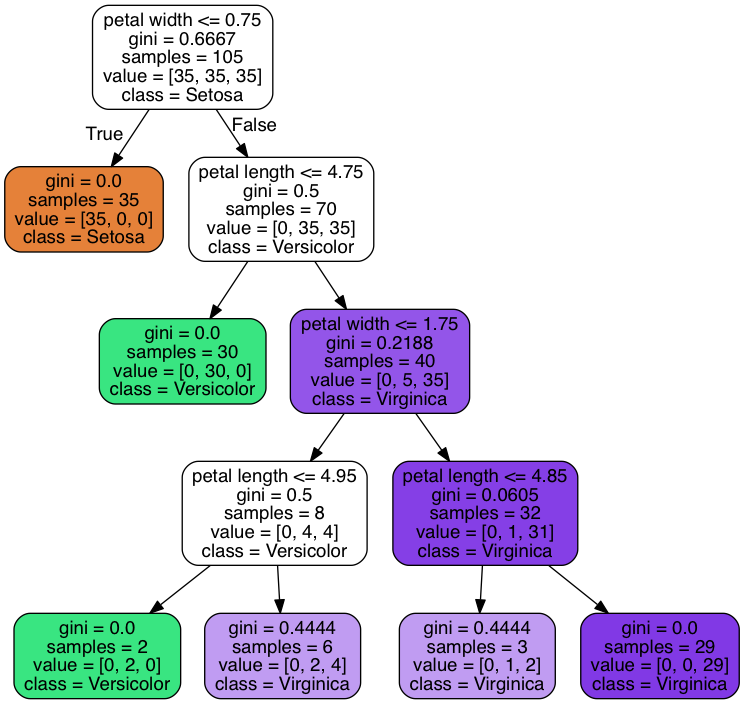

In [125]:
Image(filename='images/03_21.png', width=750)

In [126]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)


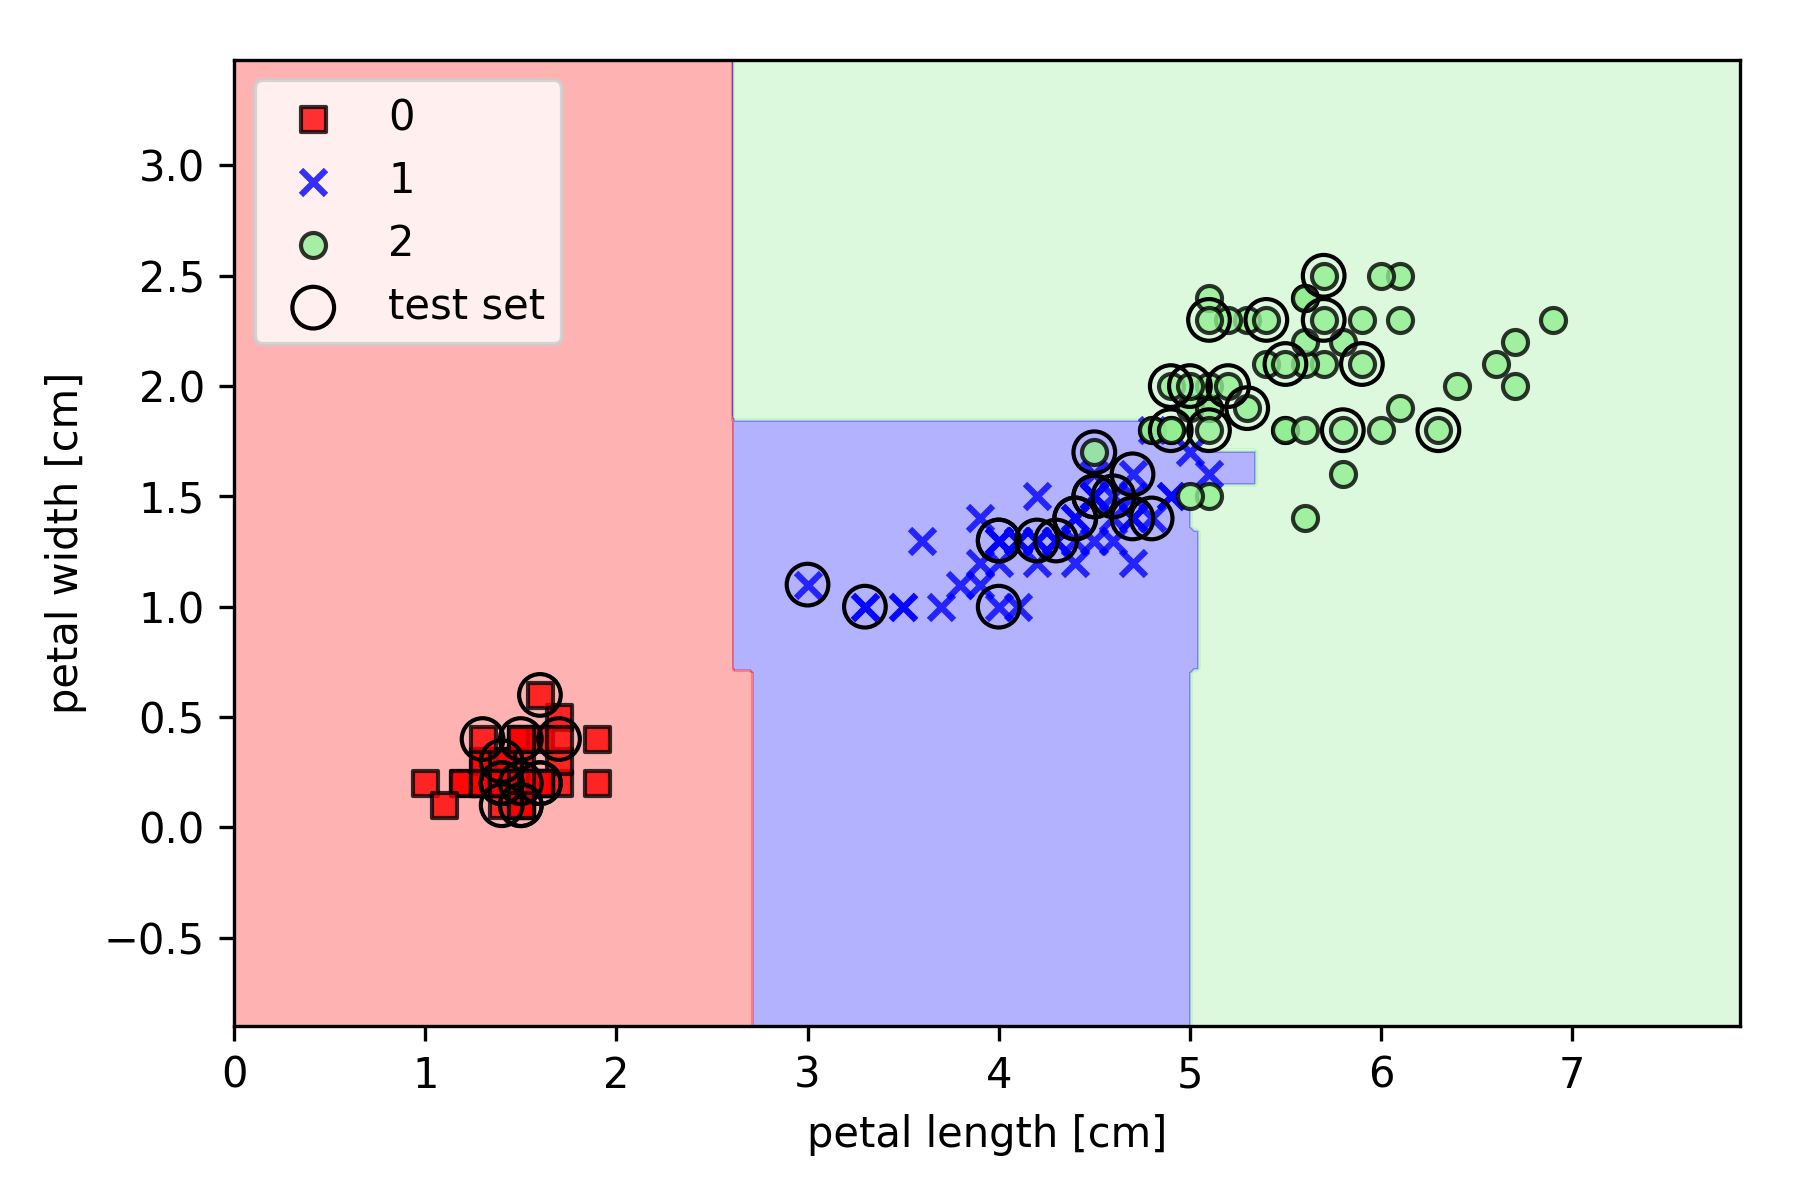

In [127]:
Image(filename='images/03_22.png', width=750)

#### 주요 하이퍼파라미터
- n_estimators: 생성할 트리의 개수
- max_depth: 트리의 최대 깊이
- min_samples_split: 노드를 분할하기 위한 최소 샘플 수
- max_features: 각 트리에서 사용할 최대 특성 수

## K-최근접 이웃 (KNN: K-Nearest Neighbors)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성
knn_model = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)


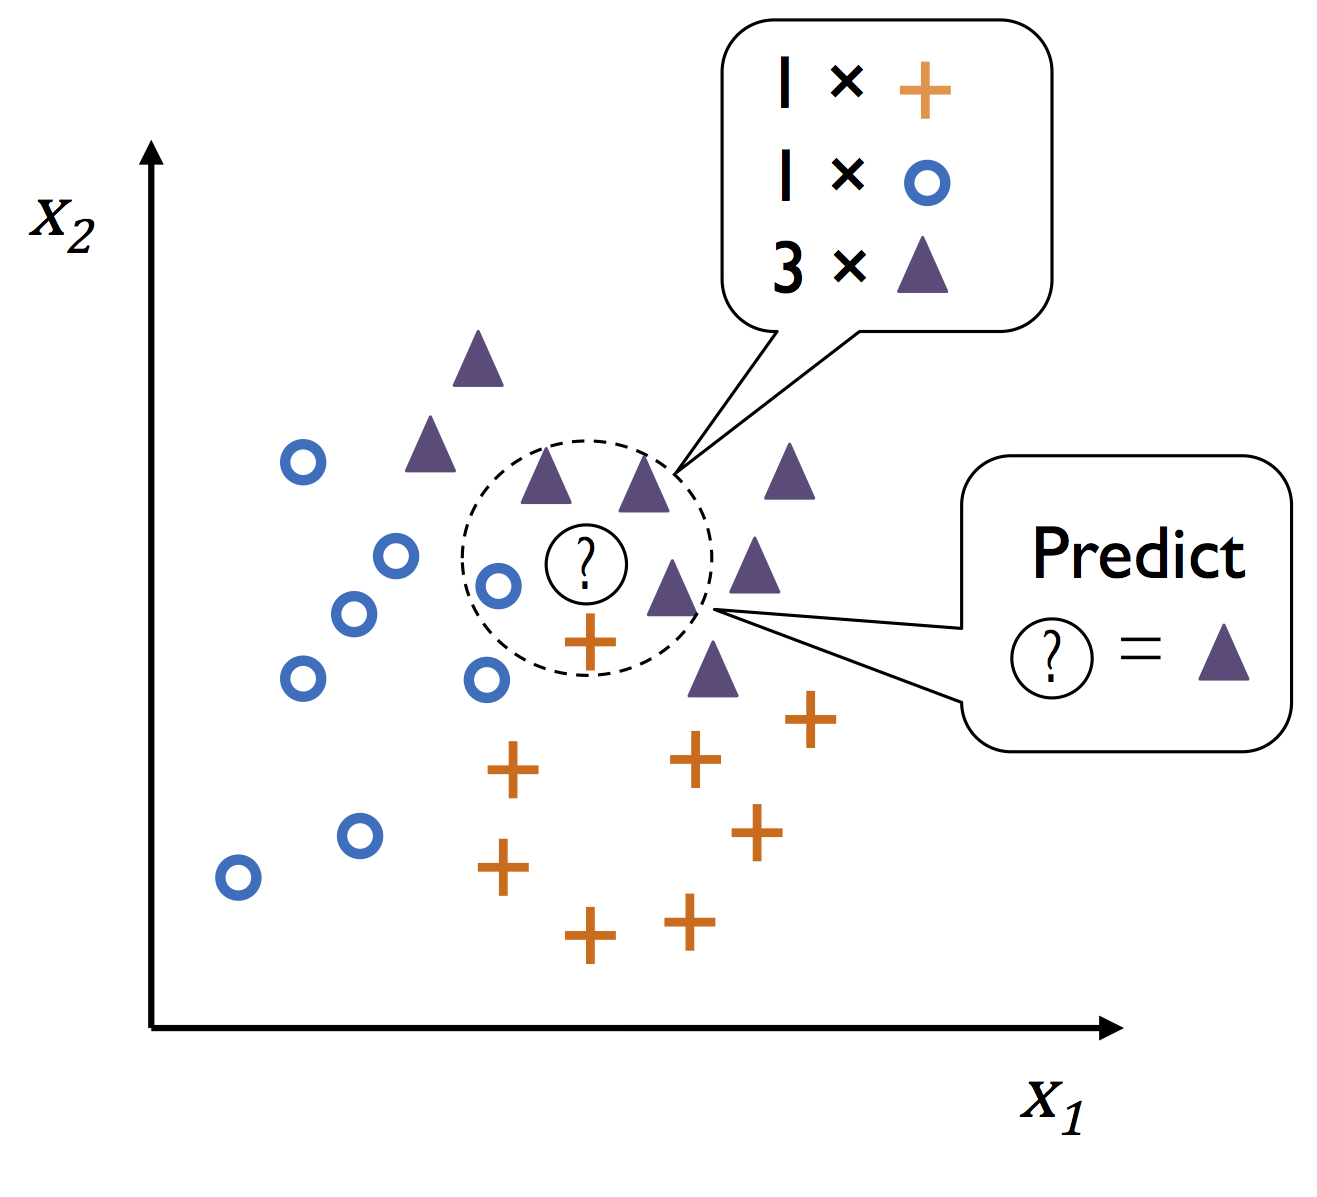

In [129]:
Image(filename='images/03_23.png', width=750)

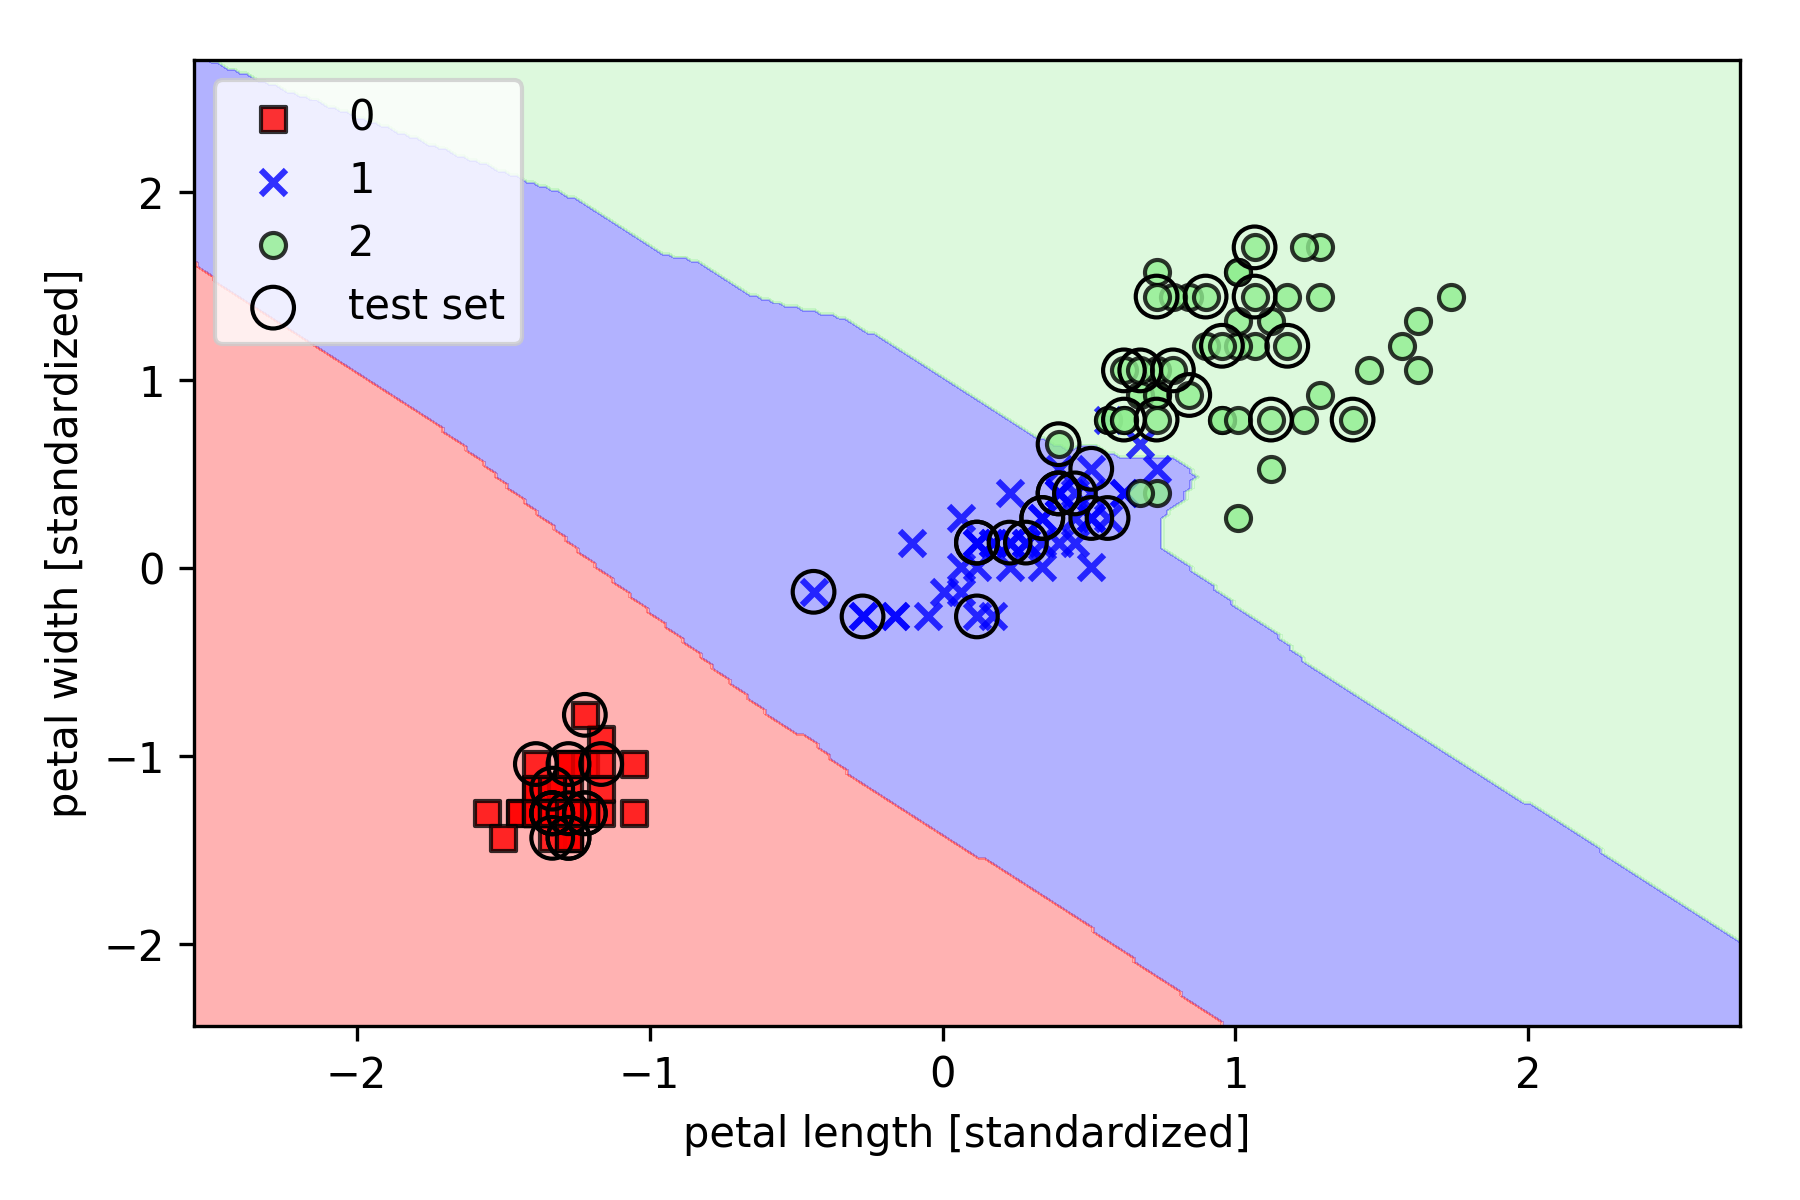

In [130]:
Image(filename='images/03_24.png', width=750)

#### 주요 하이퍼파라미터
- n_neighbors: 고려할 이웃의 수 (k)
  - k가 작을수록: 모델이 훈련 데이터에 민감해져서 과대적합(overfitting)의 가능성이 높아집니다. 즉, 노이즈에 민감해질 수 있습니다. 보통 5로 설정되며, 이는 경험적으로 적당한 값으로 알려져 있습니다.
k가 클수록: 모델이 일반화(generalization)를 잘할 수 있지만, 과소적합(underfitting)될 수 있습니다. 즉, 모델이 너무 부드러워져 데이터의 복잡한 패턴을 제대로 잡아내지 못할 수 있습니다.
- weights: 각 이웃의 가중치 ('uniform', 'distance')
  - 'uniform': 모든 이웃에게 동일한 가중치를 부여합니다. (디폴트 값)
  - 'distance': 가까운 이웃에게 더 큰 가중치를 부여합니다. 즉, 가까운 이웃일수록 더 큰 영향을 미치게 됩니다.
- metric: 거리 측정 방법 ('minkowski', 'euclidean', 'manhattan')

## 비모수 모델이란?

#### 머신러닝 알고리즘의 모수 vs 비모수 모델

모수모델 : 퍼셉트론, 아달린, 로지스틱, svm
- 훈련을하고, 그 모델을 저장한다. 이때 가중치는 결정되며 이후에는 훈련 데이터셋없이 즉시 사용가능핟.

비모수모델: 결정트리, 랜덤포레스트, knn
- 훈련이 필요없다. 고정된 가중치로 설명을 하는것이 아니라 매번 데이터셋에 대하여 곧바로 적용가능하다.